In [5]:
from sklearn import datasets, svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# 讀入iris資料集
iris = datasets.load_iris()

# 定義image data及label
iris_data = iris.data
iris_label = iris.target

print(pd.DataFrame(data=iris['data'], columns=iris['feature_names']))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [13]:
# 將資料分成training及testing，比例為8:2，並亂序
train_data, test_data, train_label, test_label = train_test_split(iris_data, iris_label, test_size=0.2, shuffle=True)

In [14]:
# 使用SVM演算法
classifier = svm.SVC(gamma=0.01,kernel='linear', C=1)
classifier.fit(train_data, train_label)

SVC(C=1, gamma=0.01, kernel='linear')

In [15]:
# 輸出預測結果及正確結果
predicted = classifier.predict(test_data)
print('predicted:', predicted)
print('true:     ', test_label)

predicted: [1 2 2 1 0 2 1 0 1 1 0 0 2 2 2 1 1 1 1 2 0 1 0 2 2 1 1 2 2 0]
true:      [1 2 2 1 0 2 1 0 1 1 0 0 2 2 2 1 1 1 1 2 0 1 0 2 2 1 1 2 2 0]


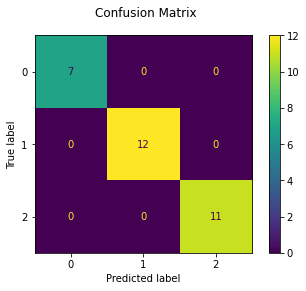

In [17]:
# 顯示混淆矩陣
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_label, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [18]:
# 顯示結果報表
# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# f1-score= 2 * precision * recall/(recision + recall)，為precision和recall的harmonic mean調和平均數
# support為實際手寫數字的總數
print(f"Classification report for classifier {classifier}:\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )

Classification report for classifier SVC(C=1, gamma=0.01, kernel='linear'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


